# Quick Start: Explore Bill Output

- Denise Case
- May 2025 

This notebook previews the outputs generated by the Zig CLI tools.  
We assume you have already run `zig-bill-utils-run.ps1` and generated the outputs.

Customize the `BILL_NAME` folder below to fetch and explore a different bill.

## Imports and Constants at the Top

In [8]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set up base paths
DIR_ROOT = Path.cwd().parent
DIR_DATA = DIR_ROOT / "data"
DIR_OUTPUT = DIR_ROOT / "output"

# Select a bill to explore
BILL_NAME = "2025-hconres0014"
DIR_INPUT_BILL = DIR_DATA / BILL_NAME
DIR_OUTPUT_BILL = DIR_OUTPUT / BILL_NAME

## Quick Check on Outputs

In [9]:
# Confirm key output files exist
print("Verifying key output files for the bill...")
for f in DIR_OUTPUT_BILL.iterdir():
    print(f.name)


Verifying key output files for the bill...
amendments
clean.txt
headings.txt
keyword_hits.txt
keyword_hits_amendments.txt
money_lines.csv
sections


## Section 1. Inspect Clean Text & Key Words

In [10]:
# View clean data
CLEAN_PATH = DIR_OUTPUT_BILL / "clean.txt"
print(f"\nReading cleaned bill text from: {CLEAN_PATH}")

try:
    with CLEAN_PATH.open(encoding="utf-8") as f:
        lines = [line.strip() for line in f.readlines()]
        print(f"Loaded {len(lines)} lines.")
        print("\n".join(lines[:40]))  # Preview first 40 lines
except FileNotFoundError:
    print("ERROR: clean.txt not found.")



Reading cleaned bill text from: c:\Users\edaci\Documents\py-bill-utils\output\2025-hconres0014\clean.txt
Loaded 1470 lines.
[Congressional Bills 119th Congress]
[From the U.S. Government Publishing Office]
[H. Con. Res. 14 Enrolled Bill (ENR)]

H.Con.Res.14
Agreed to April 10, 2025

One Hundred Nineteenth Congress

of the

United States of America


AT THE FIRST SESSION

Begun and held at the City of Washington on Friday,
the third day of January, two thousand and twenty-five


Concurrent Resolution

Resolved by the House of Representatives (the Senate concurring),

SECTION 1. CONCURRENT RESOLUTION ON THE BUDGET FOR FISCAL YEAR 2025.

(a) Declaration.--Congress declares that this resolution is the
concurrent resolution on the budget for fiscal year 2025 and that this
resolution sets forth the appropriate budgetary levels for fiscal years
through 2034.
(b) Table of Contents.--The table of contents for this concurrent
resolution is as follows:
Sec. 1. Concurrent resolution on the budget

In [11]:
# View keyword hits
KEYWORD_PATH = DIR_OUTPUT_BILL / "keyword_hits.txt"
with KEYWORD_PATH.open(encoding="utf-8") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i > 50:
            break


=== CLIMATE ===
(none)

=== BORDER ===
(none)

=== EDUCATION ===
(10) Education, Training, Employment, and Social Services
(3) Committee on education and workforce.--The Committee on
Education and Workforce shall submit changes in laws within its
(H) Committee on health, education, labor, and pensions.--
The Committee on Health, Education, Labor, and Pensions of the

=== HEALTH ===
(11) Health (550):
(H) Committee on health, education, labor, and pensions.--
The Committee on Health, Education, Labor, and Pensions of the

=== UKRAINE ===
(none)

=== FUND ===
TITLE III--RESERVE FUNDS
Sec. 3001. Reserve fund for reconciliation legislation.
Sec. 3002. Deficit-neutral reserve fund relating to government
Sec. 3003. Spending reduction reserve fund to save more than
Sec. 3004. Spending-neutral reserve fund related to current tax policy
Sec. 3005. Deficit-neutral reserve fund relating to protecting Medicare
Survivors Insurance Trust Fund and the Federal Disability Insurance
Trust Fund are as fo

## Section 2. Inspect Headings

In [12]:
HEADINGS_PATH = DIR_OUTPUT_BILL / "headings.txt"

headings = []
with HEADINGS_PATH.open(encoding="utf-8") as f:
    headings = [line.strip() for line in f.readlines()]

headings[:100]  # Preview first 100


['SECTION 1. CONCURRENT RESOLUTION ON THE BUDGET FOR FISCAL YEAR 2025.',
 'Sec. 1. Concurrent resolution on the budget for fiscal year 2025.',
 'TITLE I--RECOMMENDED LEVELS AND AMOUNTS',
 'Sec. 1101. Recommended levels and amounts.',
 'Sec. 1102. Major functional categories.',
 'Sec. 1201. Social Security in the Senate.',
 'Sec. 1202. Postal Service discretionary administrative expenses in the',
 'TITLE II--RECONCILIATION',
 'Sec. 2001. Reconciliation in the House of Representatives.',
 'Sec. 2002. Reconciliation in the Senate.',
 'TITLE III--RESERVE FUNDS',
 'Sec. 3001. Reserve fund for reconciliation legislation.',
 'Sec. 3002. Deficit-neutral reserve fund relating to government',
 'Sec. 3003. Spending reduction reserve fund to save more than',
 'Sec. 3004. Spending-neutral reserve fund related to current tax policy',
 'Sec. 3005. Deficit-neutral reserve fund relating to protecting Medicare',
 'TITLE IV--OTHER MATTERS',
 'Sec. 4001. Adjustment for spending cuts of at least $2 trillio

## Section 3. Inspect Money Lines

In [13]:
MONEY_PATH = DIR_OUTPUT_BILL / "money_lines.csv"
money_df = pd.read_csv(MONEY_PATH)
money_df.head(30)


,amount,text
0,"$2,000,000,000,000.","$2,000,000,000,000."
1,$2 trillion.,Sec. 4001. Adjustment for spending cuts of at ...
2,"$3,699,743,000,000.","Fiscal year 2025: $3,699,743,000,000."
3,"$3,850,222,000,000.","Fiscal year 2026: $3,850,222,000,000."
4,"$3,935,426,000,000.","Fiscal year 2027: $3,935,426,000,000."
5,"$4,064,380,000,000.","Fiscal year 2028: $4,064,380,000,000."
6,"$4,187,266,000,000.","Fiscal year 2029: $4,187,266,000,000."
7,"$4,388,684,000,000.","Fiscal year 2030: $4,388,684,000,000."
8,"$4,600,466,000,000.","Fiscal year 2031: $4,600,466,000,000."
9,"$4,800,588,000,000.","Fiscal year 2032: $4,800,588,000,000."


## Section 4. Visualize Clean Text


📄 Reading cleaned bill text from: c:\Users\edaci\Documents\py-bill-utils\output\2025-hconres0014\clean.txt


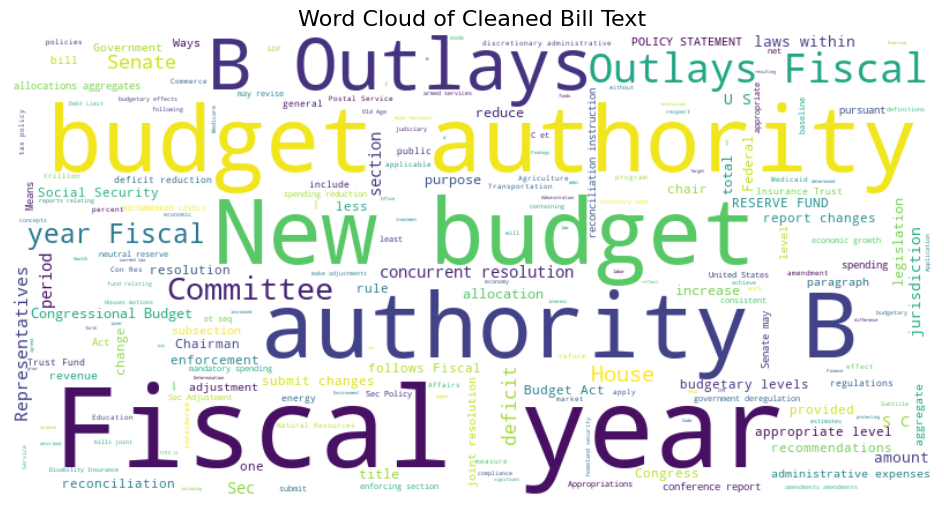

In [14]:


# Load clean.txt content
CLEAN_PATH = DIR_OUTPUT_BILL / "clean.txt"
print(f"\n📄 Reading cleaned bill text from: {CLEAN_PATH}")

try:
    with CLEAN_PATH.open(encoding="utf-8") as f:
        text = f.read()

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display it
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Cleaned Bill Text", fontsize=16)
    plt.show()

except FileNotFoundError:
    print("⚠ clean.txt not found.")


Use these examples to start exploring, visualizing, and summarizing bill data.

Try filtering money_df, building visualizations, or finding keyword frequencies.
